In [1]:
pip install python-barcode pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 kB 9.0 MB/s eta 0:00:00


In [7]:
from barcode import Code128
from barcode.writer import ImageWriter
import os
from PIL import Image
import matplotlib.pyplot as plt

def simple_barcode_generator(start_number, increment, total_characters, num_sequences):
    """
    Generate a sequence of barcodes based on a start number and increment.

    :param start_number: The starting number for barcode generation.
    :param increment: The value to increment for each subsequent barcode.
    :param total_characters: The total number of characters for each barcode.
    :param num_sequences: The number of barcodes to generate.
    :return: A list of generated barcode numbers.
    """
    barcodes = []
    for i in range(num_sequences):
        current_number = start_number + (i * increment)
        barcode = str(current_number).zfill(total_characters)
        barcodes.append(barcode)
    return barcodes

def save_barcode_image(barcode_number, output_folder="barcodes"):
    """
    Save the barcode as a PNG image.

    :param barcode_number: The barcode number as a string.
    :param output_folder: Folder to save the barcode images.
    """
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Generate and save barcode image
    barcode_obj = Code128(barcode_number, writer=ImageWriter())
    filename = os.path.join(output_folder, barcode_number)
    barcode_obj.save(filename)
    print(f"Saved barcode image: {filename}.png")

# Main program to get user input
if __name__ == "__main__":
    print("Welcome to the Simple Barcode Generator!")

    # Input for prefix, suffix, and other parameters
    prefix = input("Enter the prefix for the barcode (single digit): ")
    suffix = input("Enter the suffix for the barcode (single digit): ")

    # Get numeric parameters
    try:
        increment = int(input("Enter the increment value for each barcode: "))
        total_characters = int(input("Enter the total number of digits for each barcode: "))
        num_sequences = int(input("Enter the number of barcodes to generate: "))
    except ValueError:
        print("Invalid input. Please enter numeric values where required.")
        exit(1)

    # Generate barcodes
    generated_barcodes = simple_barcode_generator(increment, total_characters, num_sequences)

    # Add prefix and suffix to each generated barcode
    full_barcodes = [f"{prefix}{barcode}{suffix}" for barcode in generated_barcodes]
        # Save the barcodes as images
    for barcode in full_barcodes:
        save_barcode_image(barcode)




Welcome to the Simple Barcode Generator!
Enter the prefix for the barcode (single digit): 1
Enter the suffix for the barcode (single digit): 1
Enter the increment value for each barcode: 2
Enter the total number of digits for each barcode: 11
Enter the number of barcodes to generate: 3
Saved barcode image: barcodes/1000000000011.png
Saved barcode image: barcodes/1000000000031.png
Saved barcode image: barcodes/1000000000051.png


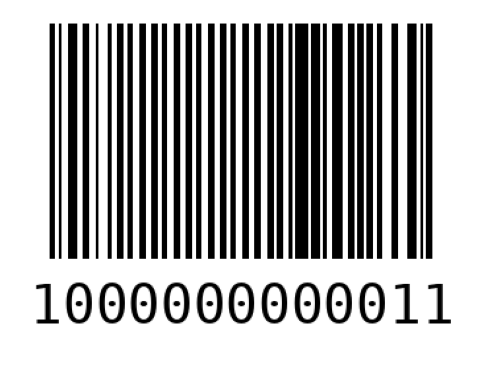

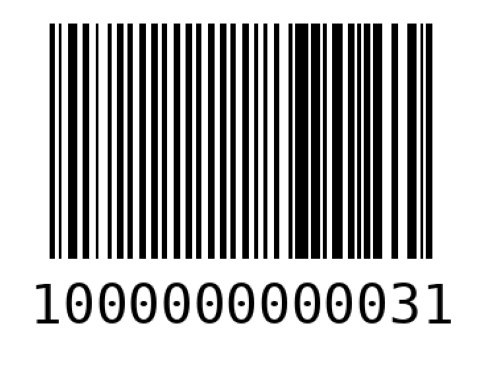

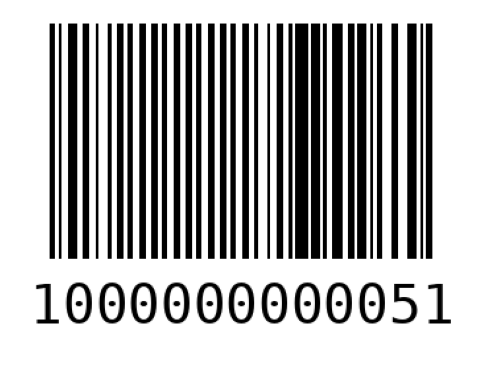

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

for barcode in full_barcodes:
  barcode_filename = f'barcodes/{barcode}'
  img = Image.open(f"{barcode_filename}.png")
  plt.imshow(img)
  plt.axis('off')  # Hide axis
  plt.show()

In [12]:
import shutil

# Create a ZIP file of the barcodes directory
shutil.make_archive('barcodes', 'zip', 'barcodes')
from google.colab import files

# Download the ZIP file
files.download('barcodes.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>